# IMPORTS

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# PREPARING DATA FOR ANALYSIS

In [2]:
uber_15=pd.read_csv(r'D:\Projects\UBER data/uber-raw-data-janjune-15.csv',encoding='utf-8')

In [3]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [4]:
uber_15.duplicated().sum()

898225

In [5]:
uber_15.drop_duplicates(inplace=True)

# Which month have maximum Uber pickups in New York City ?

In [6]:
uber_15.shape

(13372254, 4)

we can see that "Pickup_date" is a object data type,
Therefore, we have to convert this datatype into date-time bcz at the end we have to extract couple of Derived attributes.

For this we require pandas to_datetime to convert object data type to datetime dtype.

In [7]:
uber_15['Pickup_date']=pd.to_datetime(uber_15['Pickup_date'],format='%Y-%m-%d %H:%M:%S')

In [8]:
uber_15['Pickup_date'].dtype

dtype('<M8[ns]')

In [9]:
uber_15['month']=uber_15['Pickup_date'].dt.month

<AxesSubplot:>

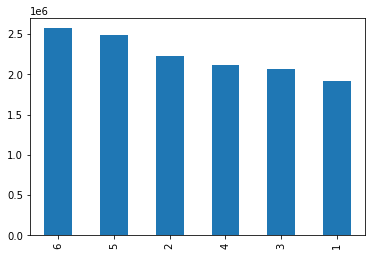

In [10]:
uber_15['month'].value_counts().plot(kind='bar')

# Lets Find out Total trips for each month & each weekdays.

In [11]:
uber_15['weekday']=uber_15['Pickup_date'].dt.day_name()
uber_15['day']=uber_15['Pickup_date'].dt.day
uber_15['month']=uber_15['Pickup_date'].dt.month
uber_15['minute']=uber_15['Pickup_date'].dt.minute
uber_15['hour']=uber_15['Pickup_date'].dt.hour

In [12]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,minute,hour
0,B02617,2015-05-17 09:47:00,B02617,141,5,Sunday,17,47,9
1,B02617,2015-05-17 09:47:00,B02617,65,5,Sunday,17,47,9
2,B02617,2015-05-17 09:47:00,B02617,100,5,Sunday,17,47,9
3,B02617,2015-05-17 09:47:00,B02774,80,5,Sunday,17,47,9
4,B02617,2015-05-17 09:47:00,B02617,90,5,Sunday,17,47,9


In [13]:
uber_15.to_csv('cleaned_uber.csv')

In [14]:
temp=uber_15.groupby(['month','weekday'],as_index=False).size()

In [15]:
temp.head()

,month,weekday,size
0,1,Friday,339285
1,1,Monday,190606
2,1,Saturday,386049
3,1,Sunday,230487
4,1,Thursday,330319


In [16]:
temp['month'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [17]:
dict_month={1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june'}

In [18]:
temp['month']=temp['month'].map(dict_month)

In [19]:
temp.head(1)

,month,weekday,size
0,jan,Friday,339285


<AxesSubplot:xlabel='month', ylabel='size'>

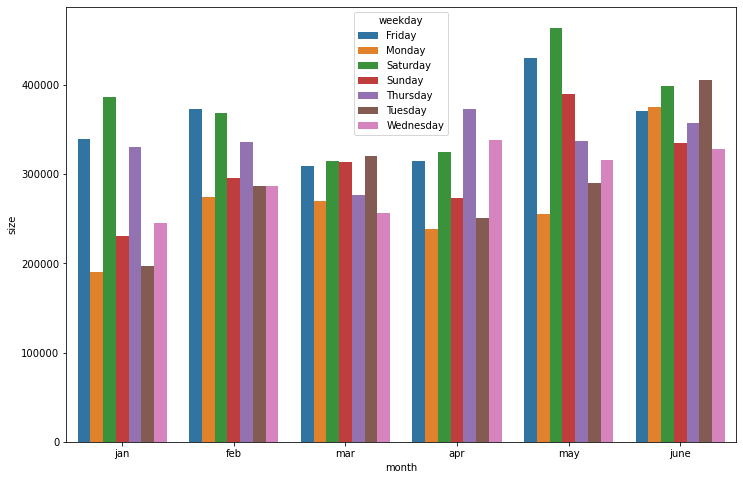

In [20]:
plt.figure(figsize=(12,8))
sns.barplot(x='month',y='size',hue='weekday',data=temp)

# Lets Find out Hourly Rush in New york city on all days.

In [21]:
summary=uber_15.groupby(['weekday','hour'],as_index=False).size()

In [22]:
summary.head(1)

,weekday,hour,size
0,Friday,0,79879


<AxesSubplot:xlabel='hour', ylabel='size'>

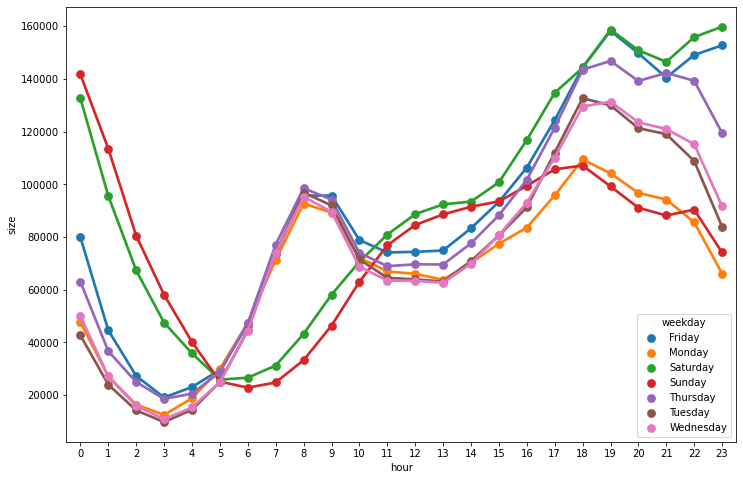

In [23]:
plt.figure(figsize=(12,8))
sns.pointplot(x='hour',y='size',hue='weekday',data=summary)

'''
It's interesting to see that Saturday and Sunday exhibit similar demand throughout the late night/morning/afternoon, 
but it exhibits opposite trends during the evening. In the evening, Saturday pickups continue to increase throughout the evening,
but Sunday pickups takes a downward turn after evening..

We can see that there the weekdays that has the most demand during the late evening is Friday and Saturday, 
which is expected, but what strikes me is that Thursday nights also exhibits very similar trends as Friday and Saturday nights.

'''

# Which Base_number has most number of Active Vehicles ?

In [24]:
uber_15.head(1)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,minute,hour
0,B02617,2015-05-17 09:47:00,B02617,141,5,Sunday,17,47,9


In [25]:
uber_foil=pd.read_csv(r'D:\Projects\UBER data/Uber-Jan-Feb-Foil.csv')

In [26]:
uber_foil.head(1)

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132


In [27]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs,plot,iplot,init_notebook_mode
init_notebook_mode(connected=True)

In [28]:
px.box(x='dispatching_base_number',y='active_vehicles',data_frame=uber_foil)

In [29]:
px.violin(x='dispatching_base_number',y='active_vehicles',data_frame=uber_foil)

# Collect entire data & Make it ready for the Data Analysis.

In [30]:
import os

In [31]:
files=os.listdir(r'D:\Projects\UBER data')[-7:]

In [32]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [33]:
files.remove('uber-raw-data-janjune-15.csv')

In [34]:
path=r'D:\Projects\UBER data'

final=pd.DataFrame()
for file in files:
    current_df=pd.read_csv(path+'/'+file,encoding='utf-8')
    final=pd.concat([current_df,final])

In [35]:
final.shape

(4534327, 4)

In [36]:
final.head(1)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512


In [37]:
final.duplicated().sum()

82581

In [38]:
final.drop_duplicates(inplace=True)

In [39]:
final.shape

(4451746, 4)

In [40]:
rush_uber=final.groupby(['Lat','Lon'],as_index=False).size()
rush_uber.head(1)

,Lat,Lon,size
0,39.6569,-74.2258,1


# At what locations of New York City we are getting rush ?

In [41]:
import folium

In [42]:
basemap=folium.Map()

In [43]:
from folium.plugins import HeatMap

In [44]:
HeatMap(rush_uber).add_to(basemap)

In [45]:
basemap.save('worldmap.html')

# Examine rush on Hour and Weekday ( Perform Pair wise Analysis ) 

In [46]:
final.head(1)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512


In [47]:
final['Date/Time']=pd.to_datetime(final['Date/Time'],format='%m/%d/%Y %H:%M:%S')

In [48]:
final['weekday']=final['Date/Time'].dt.day
final['hour']=final['Date/Time'].dt.hour

In [49]:
final.head(1)

,Date/Time,Lat,Lon,Base,weekday,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0


In [50]:
pivot=final.groupby(['weekday','hour']).size().unstack()

In [51]:
pivot.style.background_gradient()

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,,,,
1,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,4607,4729,4930,5794,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,4797,4975,5188,5695,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,4788,5065,5384,6093,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,4743,4975,5193,6175,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,5141,5011,5047,5690,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,4801,5174,5426,6258,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,4905,5166,5364,6214,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,5288,5350,5483,6318,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,5406,5443,5496,6419,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203


# Automation Of Analysis.

In [52]:
def gem_pivot_table(df,col1,col2):
    pivot=df.groupby([col1,col2]).size().unstack()
    return pivot.style.background_gradient()

In [53]:
gem_pivot_table(final,'weekday','hour')

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,,,,
1,3178,1944,1256,1308,1429,2126,3664,5380,5292,4617,4607,4729,4930,5794,6933,7910,8633,9511,8604,8001,7315,7803,6268,4050
2,2435,1569,1087,1414,1876,2812,4920,6544,6310,4712,4797,4975,5188,5695,6904,8449,10109,11100,11123,9474,8759,8357,6998,5160
3,3354,2142,1407,1467,1550,2387,4241,5663,5386,4657,4788,5065,5384,6093,7226,8850,10314,10491,11239,9599,9026,8531,7142,4686
4,2897,1688,1199,1424,1696,2581,4592,6029,5704,4744,4743,4975,5193,6175,7158,8515,9492,10357,10259,9097,8358,8649,7706,5130
5,2733,1541,1030,1253,1617,2900,4814,6261,6469,5530,5141,5011,5047,5690,6955,8312,9609,10699,10170,9430,9354,9610,8853,6518
6,4537,2864,1864,1555,1551,2162,3642,4766,4942,4401,4801,5174,5426,6258,7235,8612,9444,9929,9263,8405,8117,8567,7852,5946
7,3645,2296,1507,1597,1763,2422,4102,5575,5376,4639,4905,5166,5364,6214,7276,8474,10393,11013,10573,9472,8691,8525,7194,4801
8,2830,1646,1123,1483,1889,3224,5431,7361,7357,5703,5288,5350,5483,6318,7240,8775,9851,10673,9687,8796,8604,8367,6795,4256
9,2657,1724,1222,1480,1871,3168,5802,7592,7519,5895,5406,5443,5496,6419,7877,9220,10270,11910,11449,9804,8909,8665,7499,5203
